<a href="https://colab.research.google.com/github/Burakduran1/Arduino_FlameSensor/blob/main/Copy_of_PlantDiseaseDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
! pip install -q kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"burakcanduran","key":"4de4231b03f67b7571734c015703f631"}'}

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list

ref                                                                  title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
shreyanshverma27/online-sales-dataset-popular-marketplace-data       Online Sales Dataset - Popular Marketplace Data    7KB  2024-05-25 23:55:26           9882        174  1.0              
teocalvo/teomewhy-loyalty-system                                     TeoMeWhy Loyalty System                           21MB  2024-06-21 11:22:02            293        408  1.0              
nelgiriyewithana/most-streamed-spotify-songs-2024                    Most Streamed Spotify Songs 2024                 496KB  2024-06-15 18:50:51           1667         41  1.0              
sahilprajapati143/retail-analysis-large-dataset   

In [ ]:
! kaggle datasets download -d 'rashikrahmanpritom/plant-disease-recognition-dataset'

Dataset URL: https://www.kaggle.com/datasets/rashikrahmanpritom/plant-disease-recognition-dataset
License(s): CC0-1.0
100% 1.24G/1.25G [00:26<00:00, 37.9MB/s]
100% 1.25G/1.25G [00:26<00:00, 49.7MB/s]


In [ ]:
! mkdir plants

In [ ]:
! unzip plant-disease-recognition-dataset.zip -d plants

Archive:  plant-disease-recognition-dataset.zip
  inflating: plants/Test/Test/Healthy/8ddaa5a5caa5caa8.jpg  
  inflating: plants/Test/Test/Healthy/8ddaac1bd6c8cd0a.jpg  
  inflating: plants/Test/Test/Healthy/8ddd5ec1c0de38c4.jpg  
  inflating: plants/Test/Test/Healthy/8def3f60308ab41b.jpg  
  inflating: plants/Test/Test/Healthy/8def4d91382175c3.jpg  
  inflating: plants/Test/Test/Healthy/8df452e2e38c0b6e.jpg  
  inflating: plants/Test/Test/Healthy/8dfae9d78cc32089.jpg  
  inflating: plants/Test/Test/Healthy/8e3dbccdfe08c850.jpg  
  inflating: plants/Test/Test/Healthy/8e68163c62dc57d5.jpg  
  inflating: plants/Test/Test/Healthy/8e6a823cce9ff40c.jpg  
  inflating: plants/Test/Test/Healthy/8e77857194a59a87.jpg  
  inflating: plants/Test/Test/Healthy/8e79802b3fb770c8.jpg  
  inflating: plants/Test/Test/Healthy/8e7986d1ecd36445.jpg  
  inflating: plants/Test/Test/Healthy/8e7e70a6878c1c79.jpg  
  inflating: plants/Test/Test/Healthy/8e82b1a51bd11afe.jpg  
  inflating: plants/Test/Test/Healthy

In [ ]:
from numpy import array as npArray
from pandas import read_csv as pdReadCsv
from pandas import DataFrame as DF
import matplotlib.pyplot as plt

from cv2 import imread as cv2Imread, IMREAD_GRAYSCALE as cv2IMREAD_GRAYSCALE, resize as cv2Resize

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
# from sklearn.metrics import classification_report,mean_absolute_error,mean_squared_error,r2_score
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
from seaborn import heatmap as snsHeatmap

from os import listdir as osListdir,mkdir as osMkdir
from os.path import join as osPathJoin,isdir as osPathIsdir

from joblib import dump as joblibDump , load as joblibLoad
from time import time,strftime,localtime
from skimage.feature import hog


In [ ]:
def HOGImageProcessing(image,width=256,height=256):
  # Resize işlemi
  resized_image = cv2Resize(image, (width, height))
  # HOG parametreleri
  orientations = 9  # Yönelim sayısı
  pixels_per_cell = (8, 8)  # Hücre boyutu
  cells_per_block = (2, 2)  # Blok boyutu
  visualize = True  # HOG görüntüsünü görselleştirme

  # HOG özellik çıkarımı
  features, hog_image = hog(resized_image, orientations=orientations, pixels_per_cell=pixels_per_cell,
                          cells_per_block=cells_per_block, visualize=visualize, block_norm='L2-Hys')
  return [features, hog_image]

In [ ]:
def load_images_from_folder(folder):
    images = []
    labels = []
    for class_folder in osListdir(folder):
        class_path = osPathJoin(folder, class_folder)
        if osPathIsdir(class_path):
            label = class_folder
            for filename in osListdir(class_path):
                img_path = osPathJoin(class_path, filename)
                img = cv2Imread(img_path, cv2IMREAD_GRAYSCALE)
                if img is not None:
                    images.append(HOGImageProcessing(img)[0])
                    labels.append(label)
    return npArray(images), npArray(labels)

In [ ]:
# Veri yüklemesi
X, y = load_images_from_folder("/content/plants/Train/Train/")  # "Train" klasörü altındaki görüntüleri yükle

# Verileri eğitim ve test kümelerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
print(len(X_train))
print(len(X_train[0]))
print(X_train)
print(y_train)

1057
34596
[[0.31706668 0.18576835 0.09717603 ... 0.03010532 0.04074443 0.04101009]
 [0.22588196 0.07520645 0.11584751 ... 0.0113533  0.00910385 0.02078443]
 [0.29253341 0.         0.03347499 ... 0.2632989  0.13590598 0.21974888]
 ...
 [0.26271571 0.1138713  0.08240232 ... 0.03114206 0.14505021 0.02321192]
 [0.22963559 0.17838074 0.08558651 ... 0.04909802 0.22521841 0.17957462]
 [0.30772481 0.19259764 0.01926918 ... 0.07530927 0.1604528  0.12523136]]
['Rust' 'Powdery' 'Powdery' ... 'Rust' 'Healthy' 'Rust']


In [ ]:
def get_turkey_time():
    # Türkiye'nin saat dilimi (GMT+3)
    utc_offset = 3 * 60 * 60  # 3 saatlik fark saniye cinsinden
    current_time_utc = time()

    # Şu anki zamanı Türkiye saatine çevir
    turkey_time_seconds = current_time_utc + utc_offset
    return turkey_time_seconds

#KNN

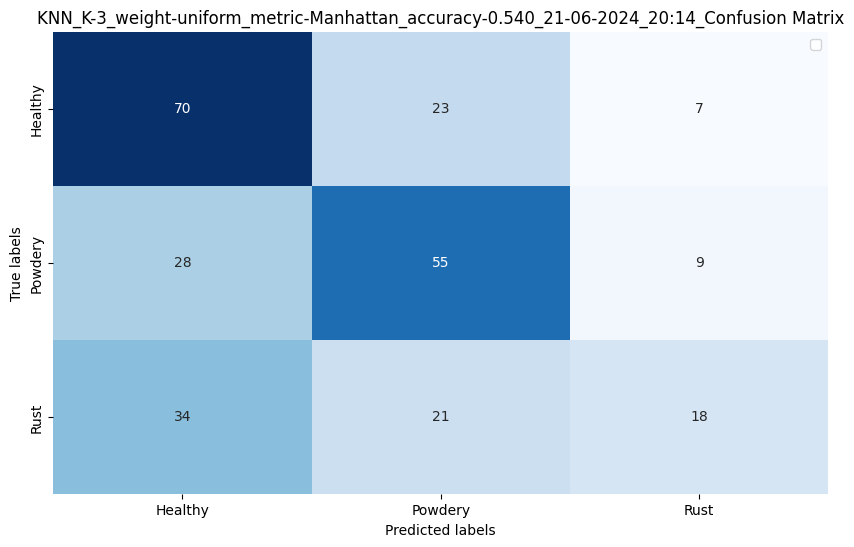

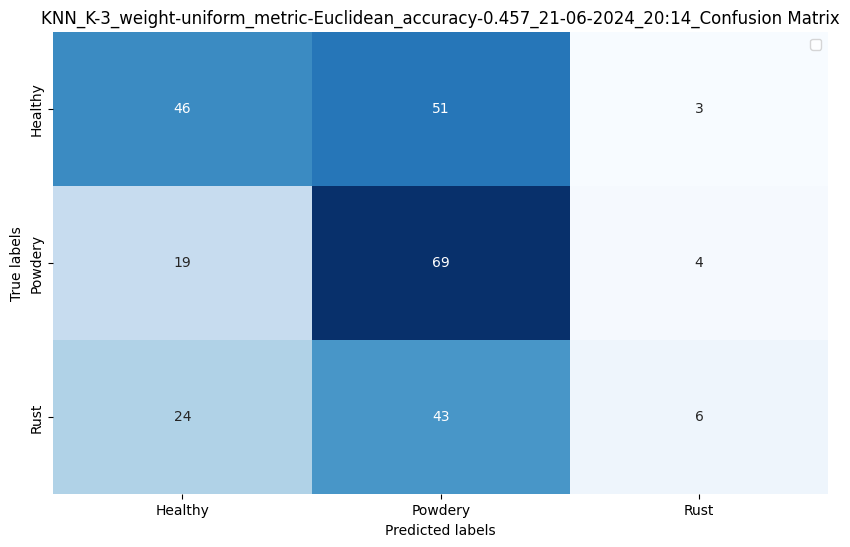

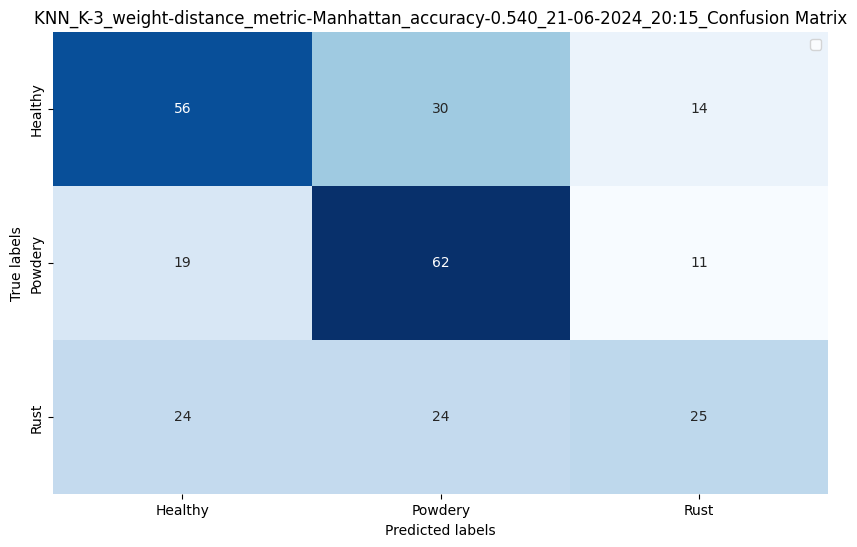

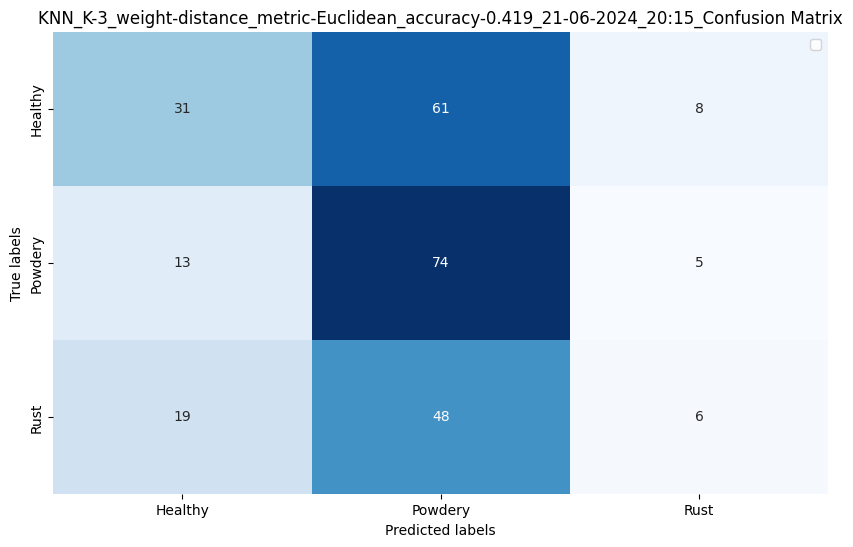

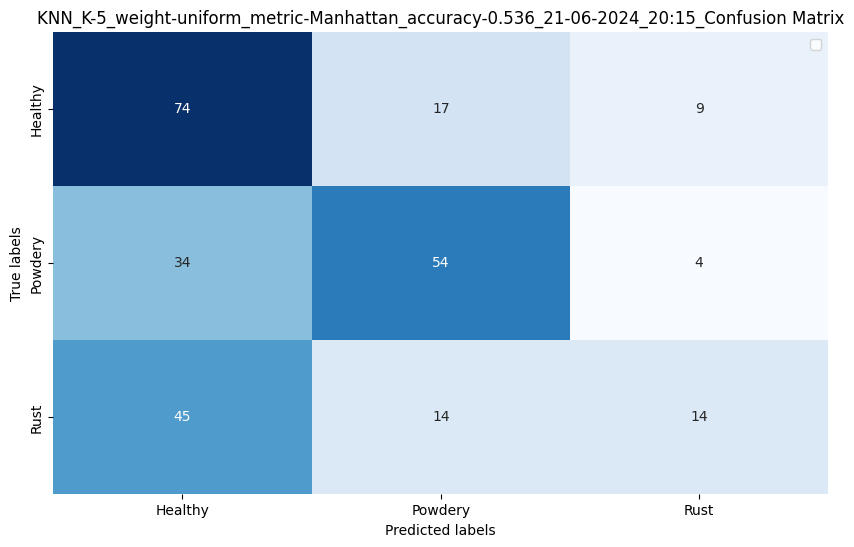

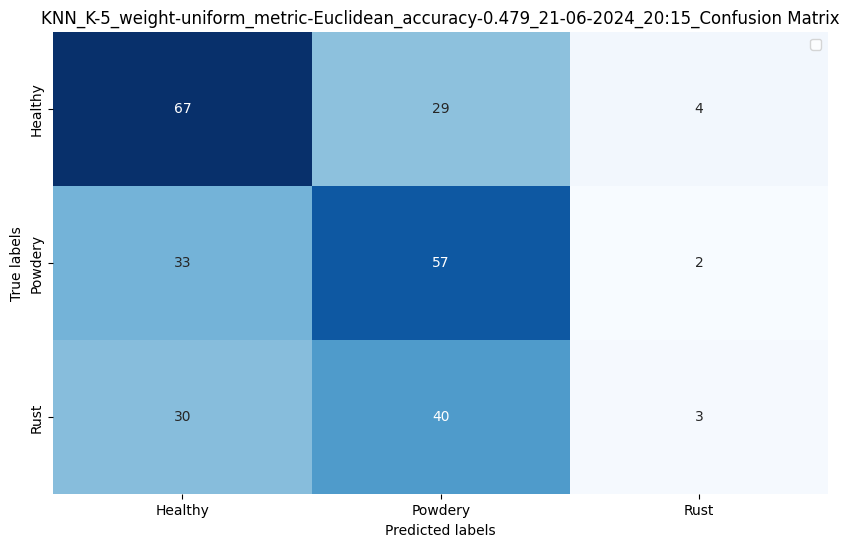

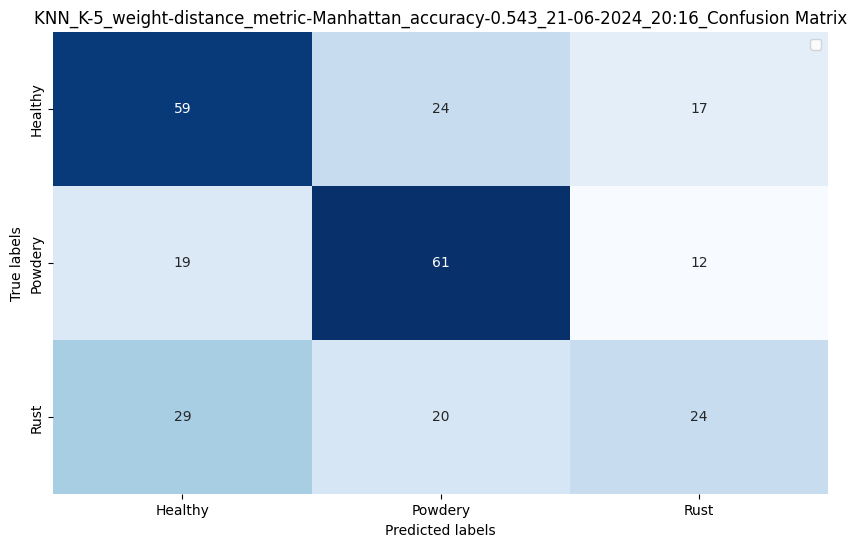

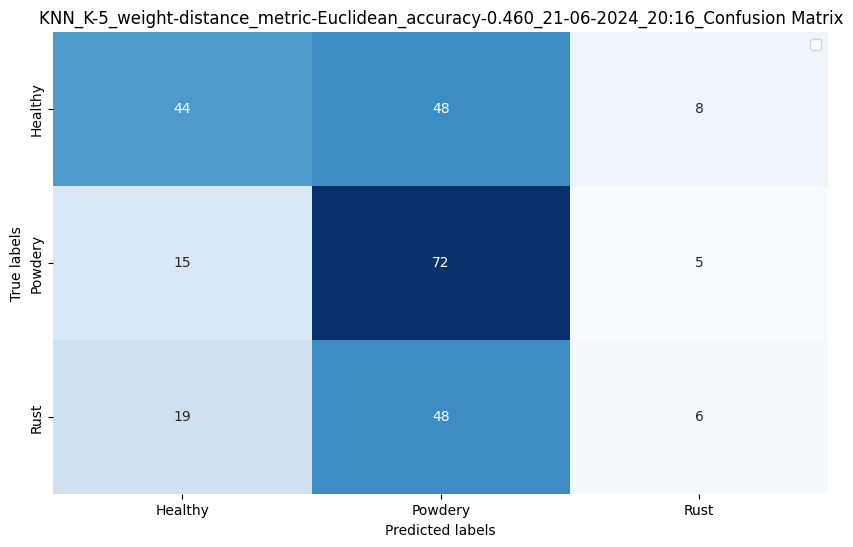

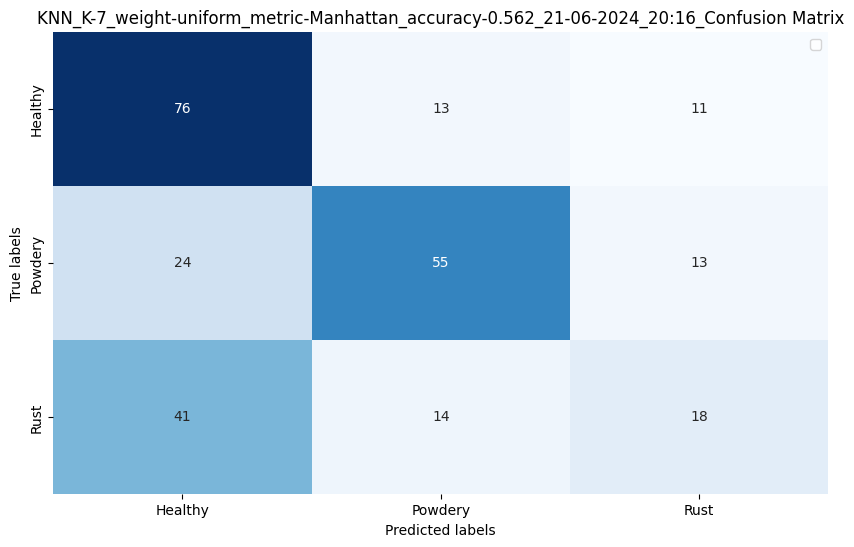

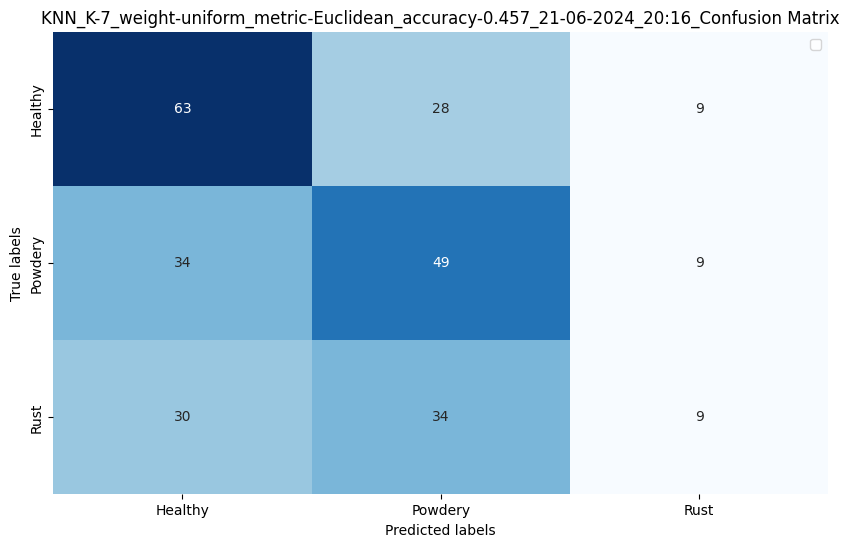

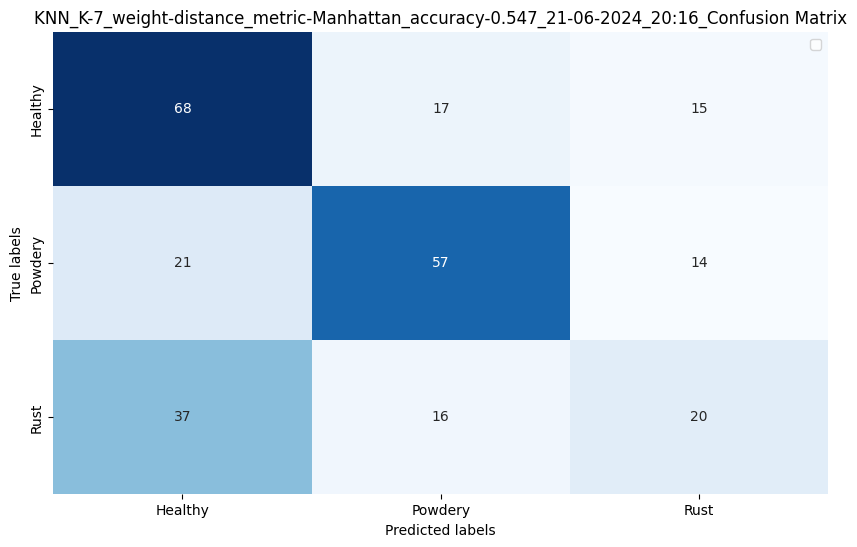

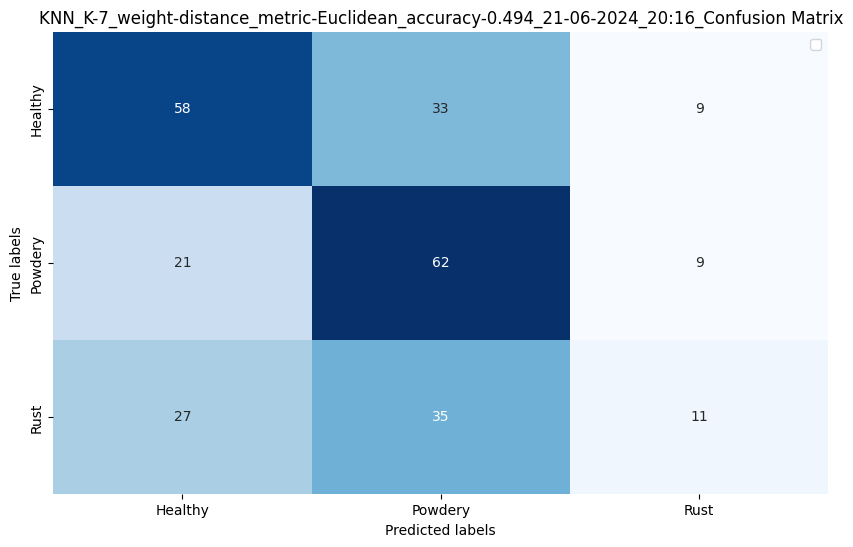

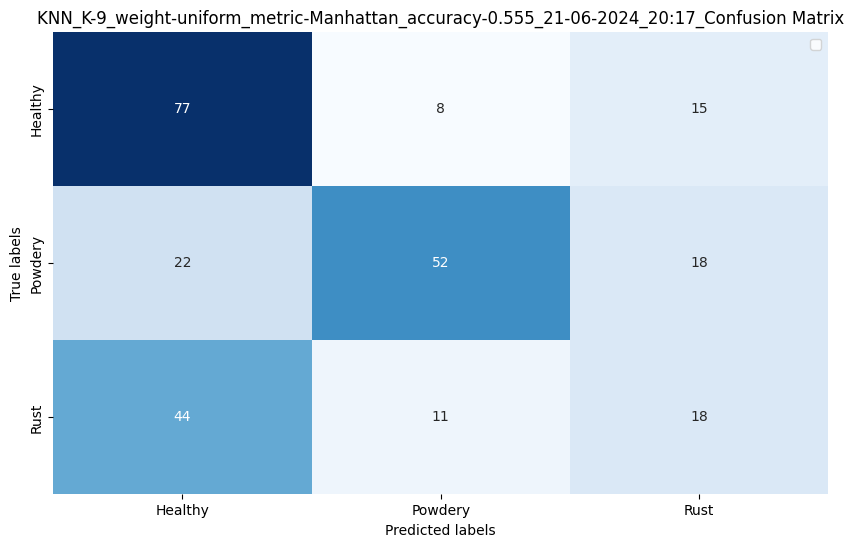

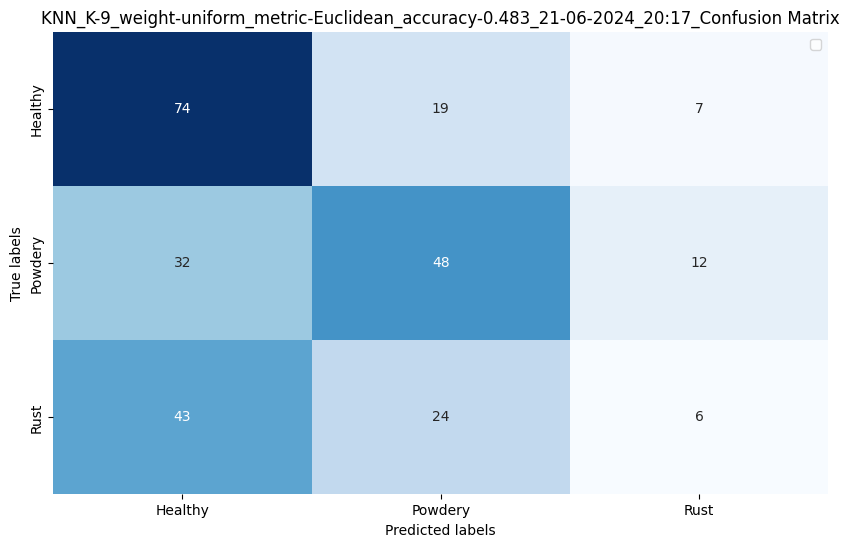

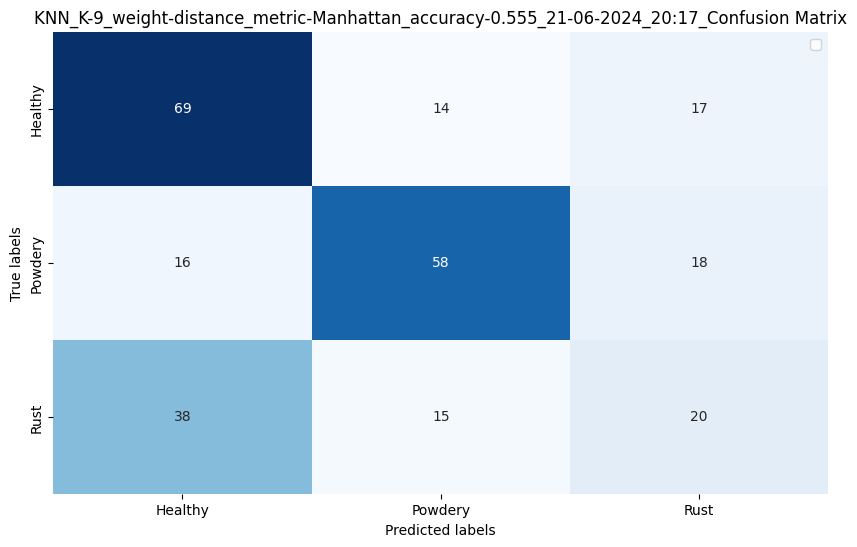

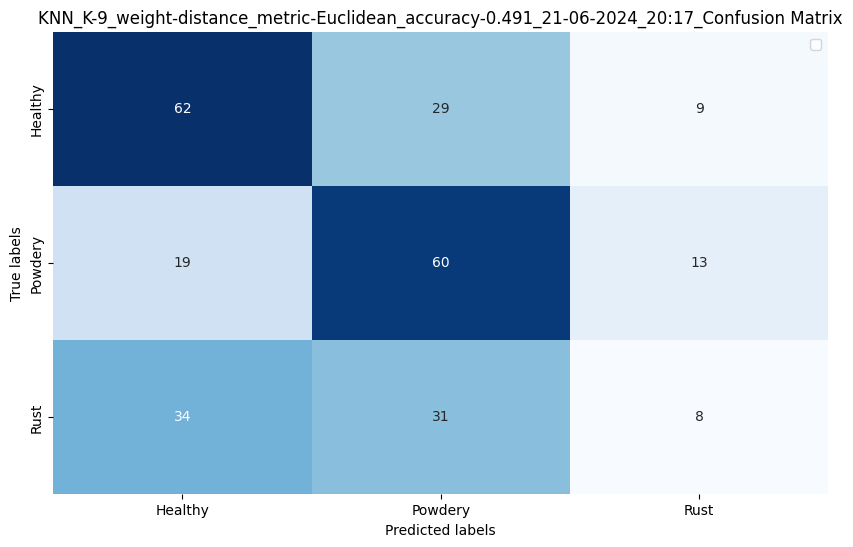

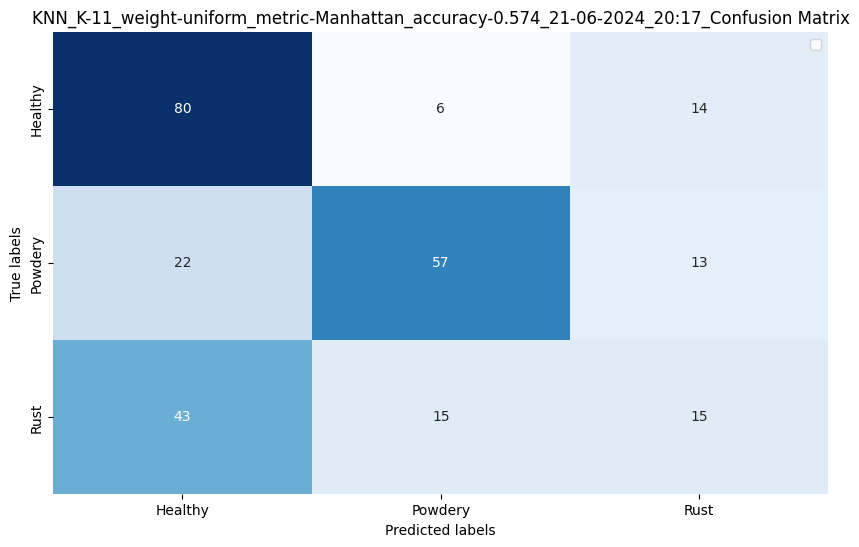

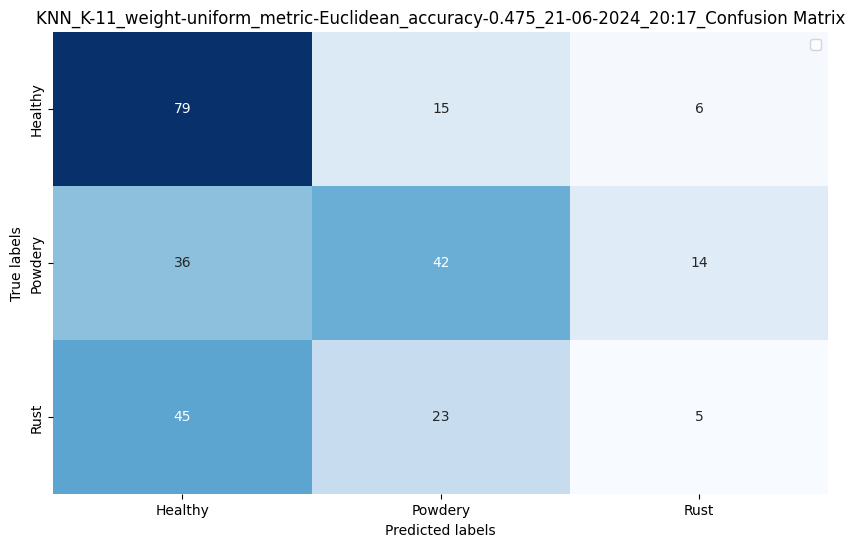

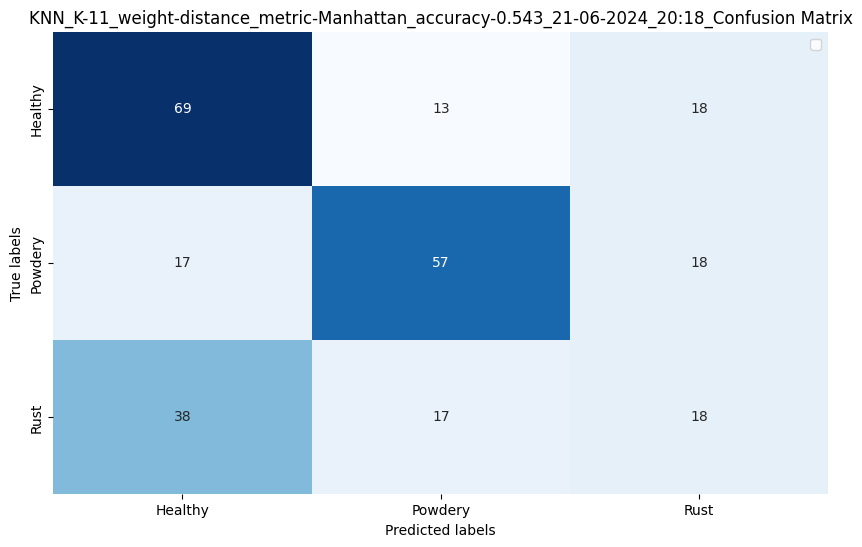

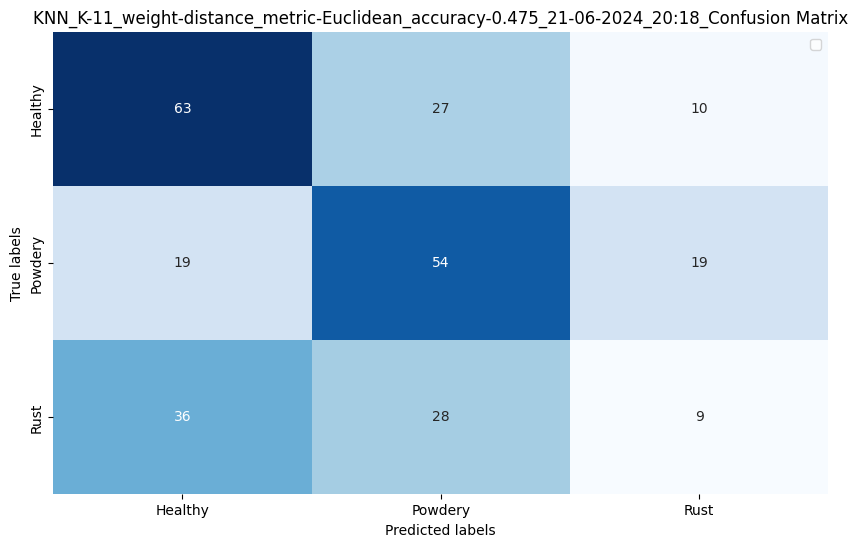

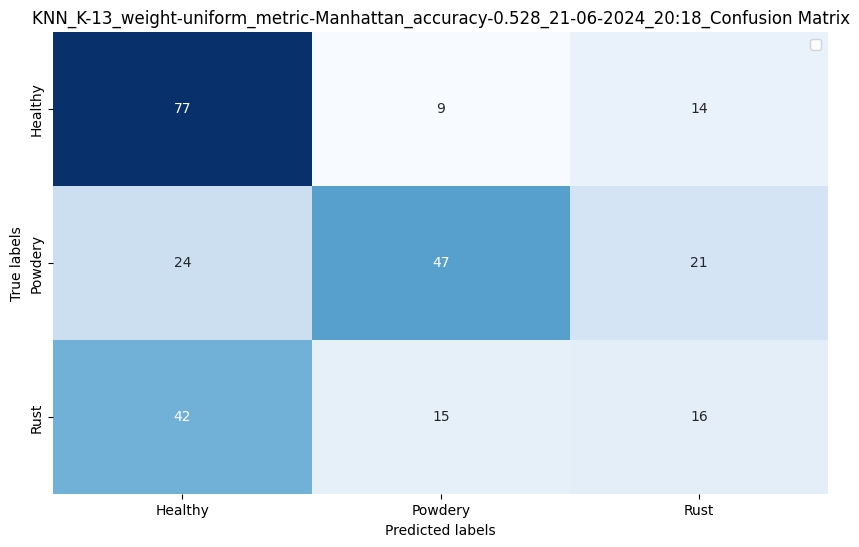

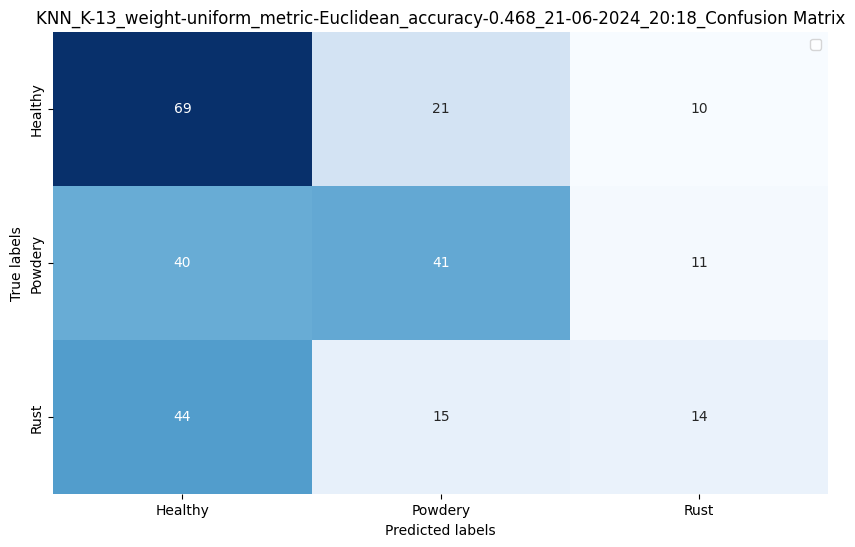

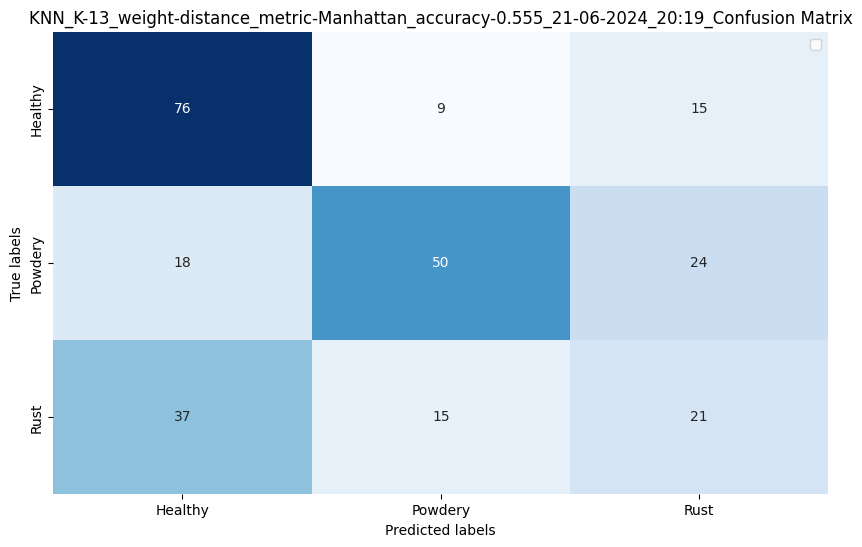

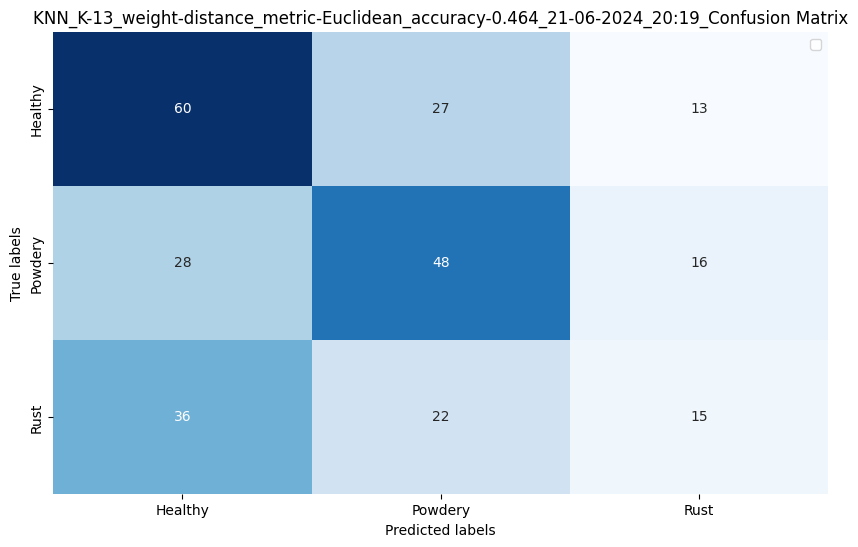

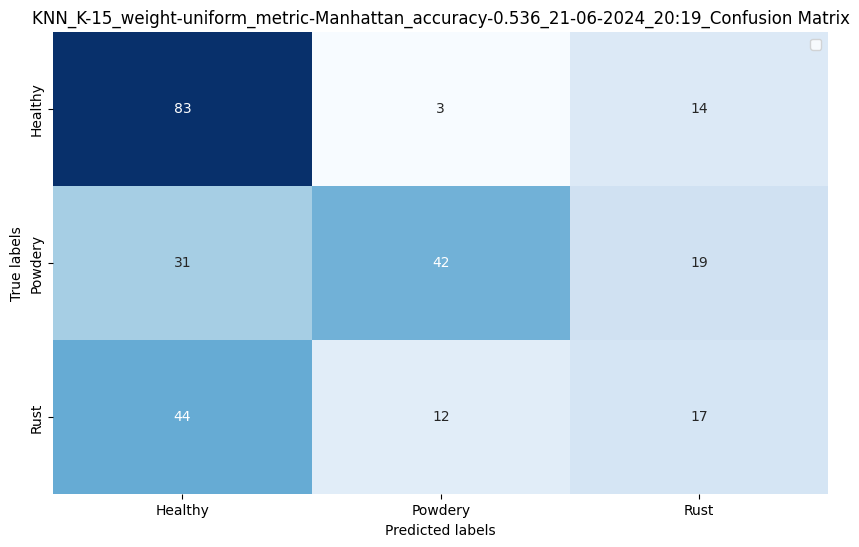

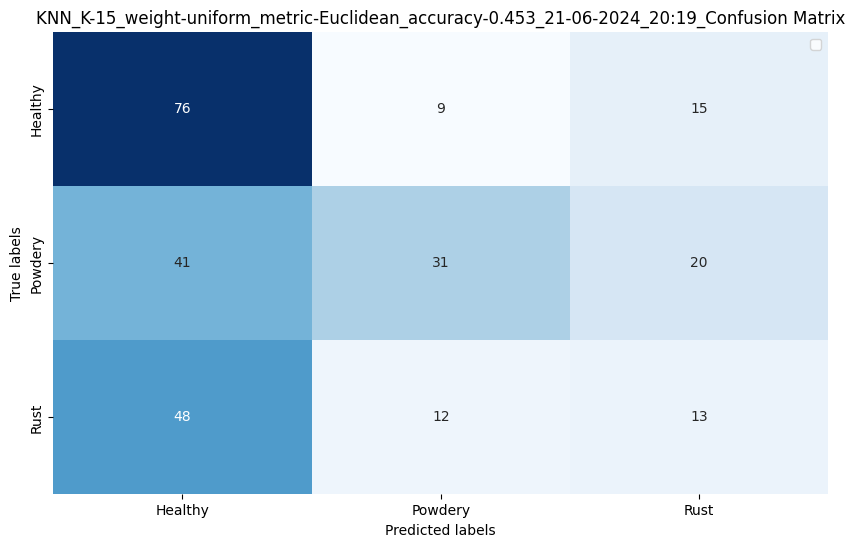

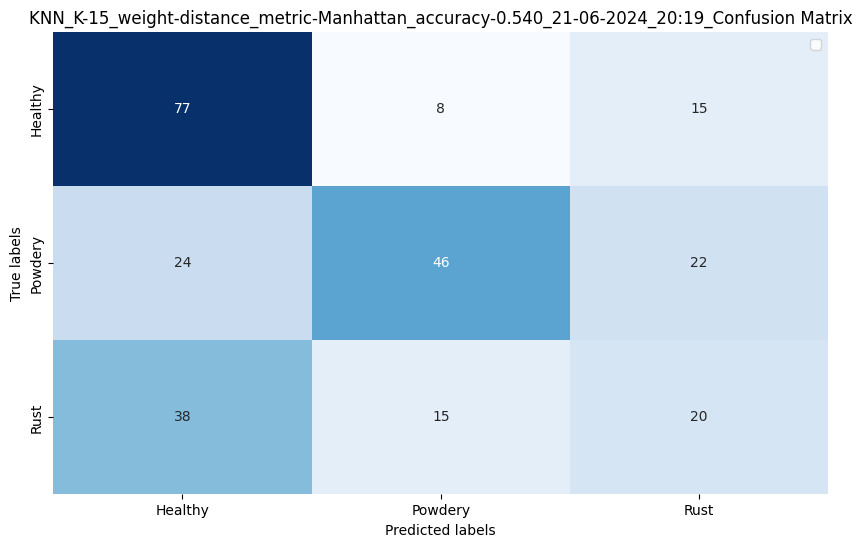

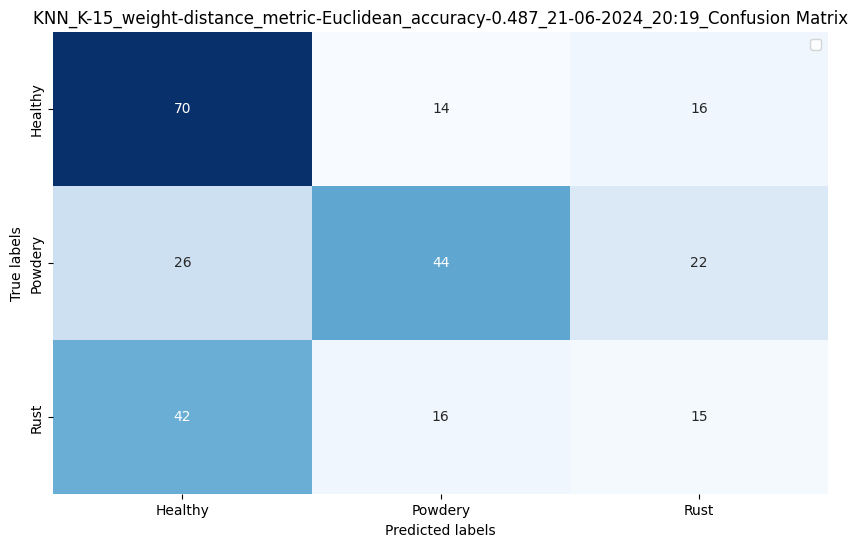

,K,Weight,Metric,Accuracy,Confusion_matrix
16,11,uniform,Manhattan,0.573585,"[[80, 6, 14], [22, 57, 13], [43, 15, 15]]"
8,7,uniform,Manhattan,0.562264,"[[76, 13, 11], [24, 55, 13], [41, 14, 18]]"
14,9,distance,Manhattan,0.554717,"[[69, 14, 17], [16, 58, 18], [38, 15, 20]]"
22,13,distance,Manhattan,0.554717,"[[76, 9, 15], [18, 50, 24], [37, 15, 21]]"
12,9,uniform,Manhattan,0.554717,"[[77, 8, 15], [22, 52, 18], [44, 11, 18]]"
10,7,distance,Manhattan,0.547170,"[[68, 17, 15], [21, 57, 14], [37, 16, 20]]"
18,11,distance,Manhattan,0.543396,"[[69, 13, 18], [17, 57, 18], [38, 17, 18]]"
6,5,distance,Manhattan,0.543396,"[[59, 24, 17], [19, 61, 12], [29, 20, 24]]"
26,15,distance,Manhattan,0.539623,"[[77, 8, 15], [24, 46, 22], [38, 15, 20]]"
0,3,uniform,Manhattan,0.539623,"[[70, 23, 7], [28, 55, 9], [34, 21, 18]]"


In [ ]:
# Tüm k değerleri, ağırlık ve mesafe metrikleri için olası seçenekler
mainFolderPath=f"/content/drive/MyDrive/YMU410YapayZekaUzmanSistemler/"
k_values = [3, 5, 7, 9, 11, 13,15]
weight_options = ['uniform', 'distance']
# distance_metrics = [1, 2, 3] # 1: Manhattan, 2: Euclidean 3: Minkowski
distance_metrics = [1, 2] # 1: Manhattan, 2: Euclidean 3: Minkowski
# met=["Manhattan","Euclidean","Minkowski"]
met=["Manhattan","Euclidean"]
# Sonuçları saklamak için bir liste oluşturma
results = []

# Tüm parametre kombinasyonları üzerinde döngü
KnnFolder=f"KNN_"+strftime('%d-%m-%Y_%H:%M', localtime(get_turkey_time()))+"/"
modelFolder=mainFolderPath+KnnFolder

osMkdir(osPathJoin("/content/drive/MyDrive/YMU410YapayZekaUzmanSistemler/", KnnFolder))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
for k in k_values:
    for weight in weight_options:
        for metric in distance_metrics:
            # KNN modelini tanımlama ve eğitme
            knn_classifier = KNeighborsClassifier(n_neighbors=k, weights=weight, p=metric)
            knn_classifier.fit(X_train, y_train)

            # Modeli test etme
            y_pred = knn_classifier.predict(X_test)
            accuracyScore = accuracy_score(y_test, y_pred)

            # squared_error = mean_squared_error(y_test,y_pred)
            # absolute_error = mean_absolute_error(y_test,y_pred)
            # r2 = r2_score(y_test, y_pred)

            # precision_score=precision_score(y_test, y_pred)
            # recall_score= recall_score(y_test, y_pred)
            # f1_score= f1_score(y_test, y_pred)
            confusionMatrix= confusion_matrix(y_test, y_pred)

            timeTR=strftime('%d-%m-%Y_%H:%M', localtime(get_turkey_time()))
            modelPath=f"KNN_K-{k}_weight-{weight}_metric-{met[metric-1]}_accuracy-{accuracyScore:.3f}_"+timeTR

            joblibDump(knn_classifier, modelFolder + modelPath + '.pkl')
            # Sonuçları listeye ekleme
            results.append({'K': k,
                            'Weight': weight,
                            'Metric': met[metric-1],
                            'Accuracy': accuracyScore,
                            # 'Squared_error':squared_error,
                            # 'Absolute_error':absolute_error,
                            # 'R2':r2,
                            # 'Precision_score':precision_score,
                            # 'Recall_score':recall_score,
                            # 'F1_score':f1_score,
                            'Confusion_matrix':confusionMatrix,
                            })

            class_labels=["Healthy","Powdery","Rust"]
            plt.figure(figsize=(10, 6))
            snsHeatmap(confusionMatrix, annot=True, cmap='Blues', fmt='g', cbar=False, xticklabels=class_labels, yticklabels=class_labels)
            plt.xlabel('Predicted labels')
            plt.ylabel('True labels')
            plt.title(modelPath+'_Confusion Matrix')
            plt.savefig(modelFolder + modelPath+f'_Confusion Matrix.png')
            plt.legend()
            plt.show()

# Sonuçları DataFrame'e dönüştürme
timeTR=f"KNN_"+strftime("%d-%m-%Y_%H:%M", localtime(get_turkey_time()))
results_df = DF(results).sort_values(by=[
    # 'R2'
    'Accuracy'
    ],ascending=False)
results_df.to_excel(modelFolder+timeTR+".xlsx")
# print(results_df)
results_df


In [ ]:
# loaded_model = joblibLoad(modelPath+'.pkl')